# 🧠 Step 1: Load & Explore the Superstore Dataset

### 📌 Goal:
- Load the Superstore dataset from Kaggle
- Fix encoding issues (if any)
- Explore the first few rows and basic info

---

### 📁 Dataset Used:
- **Dataset Name**: Superstore Sales Dataset
- **File**: `SampleSuperstore.csv`
- **Path**: `/kaggle/input/superstore-data/SampleSuperstore.csv`

In [1]:
import pandas as pd
df = pd.read_csv("/content/sample_data/SampleSuperstore.csv", encoding='latin1')  # latin1 we use bcoz there are some special char and bydefault it is UTF8
df.head() #df => dataframe

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# 🧼 Step 2: Clean & Prepare Time Series Data

### 1. Clean Column Names
We made all column names lowercase and replaced spaces with underscores to avoid coding errors.

### 2. Convert order_date to Datetime Format
This helps Prophet model understand the time-series nature of the data.

### 3. Group Daily Sales
We summed up sales on the same dates to get one row per day.

### 4. Rename Columns for Prophet
Prophet model requires columns to be named ds for date and y for the value.

### 5. Save Cleaned Data
To reuse or import into Power BI later, we save it as a CSV.

In [2]:
# 1. Clean Column Names
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# 2. Convert order_date to Datetime Format
df['order_date'] = pd.to_datetime(df['order_date'])
df.dtypes

,0
row_id,int64
order_id,object
order_date,datetime64[ns]
ship_date,object
ship_mode,object
customer_id,object
customer_name,object
segment,object
country,object
city,object


In [4]:
# 3. Group Daily Sales
daily_sales = df.groupby('order_date')['sales'].sum().reset_index()
daily_sales.head()

,order_date,sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


In [5]:
# 4. Rename Columns for Prophet
daily_sales.columns = ['ds', 'y']
daily_sales.head()

,ds,y
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


In [6]:
# 5. Save Cleaned Data
daily_sales.to_csv("cleaned_sales.csv", index=False)

# 🔮 Step 3: Forecast Sales using Prophet (ML Model)

### 📦 What is Prophet?
Prophet is a machine learning model developed by Meta (Facebook) to forecast time-series data like sales, weather, etc.

---

### 🚀 What We Did

1. **Installed Prophet** using pip in Kaggle
2. **Loaded cleaned sales data** with columns `ds` (date) and `y` (sales)
3. **Trained Prophet model** on past data
4. **Forecasted next 30 days** using `make_future_dataframe`
5. **Plotted graph** to see future sales trend

---

### 📊 Output

- Forecast table with:
  - `ds`: future dates
  - `yhat`: predicted sales
  - `yhat_lower` and `yhat_upper`: uncertainty range
- Line graph showing past + future sales trend
- Components graph showing weekly/seasonal trend



In [7]:
!pip install prophet

In [8]:
# 2. Import Prophet & Load Clean Data

from prophet import Prophet
import pandas as pd

# Load the cleaned data if needed
df = pd.read_csv("cleaned_sales.csv")  # or use daily_sales if still in memory
df.head()

,ds,y
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


In [9]:
# 3. Initialize & Train Prophet Model

model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe6pfx1ko/br40b7qz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe6pfx1ko/sn87h_z6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38113', 'data', 'file=/tmp/tmpe6pfx1ko/br40b7qz.json', 'init=/tmp/tmpe6pfx1ko/sn87h_z6.json', 'output', 'file=/tmp/tmpe6pfx1ko/prophet_modelrqdwl44_/prophet_model-20250727145224.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:52:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:52:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [10]:
# 4. Create Future Dataframe for Prediction

future = model.make_future_dataframe(periods=30)
future.tail()

,ds
1262,2018-01-25
1263,2018-01-26
1264,2018-01-27
1265,2018-01-28
1266,2018-01-29


In [11]:
# 5. Forecast Future Sales

forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1262,2018-01-25,1967.777263,-784.061151,4691.201357
1263,2018-01-26,2265.020709,-519.689523,4879.592354
1264,2018-01-27,1893.916198,-901.413051,4718.805537
1265,2018-01-28,2094.962071,-791.488435,4938.544106
1266,2018-01-29,2313.354144,-578.769232,5042.819026


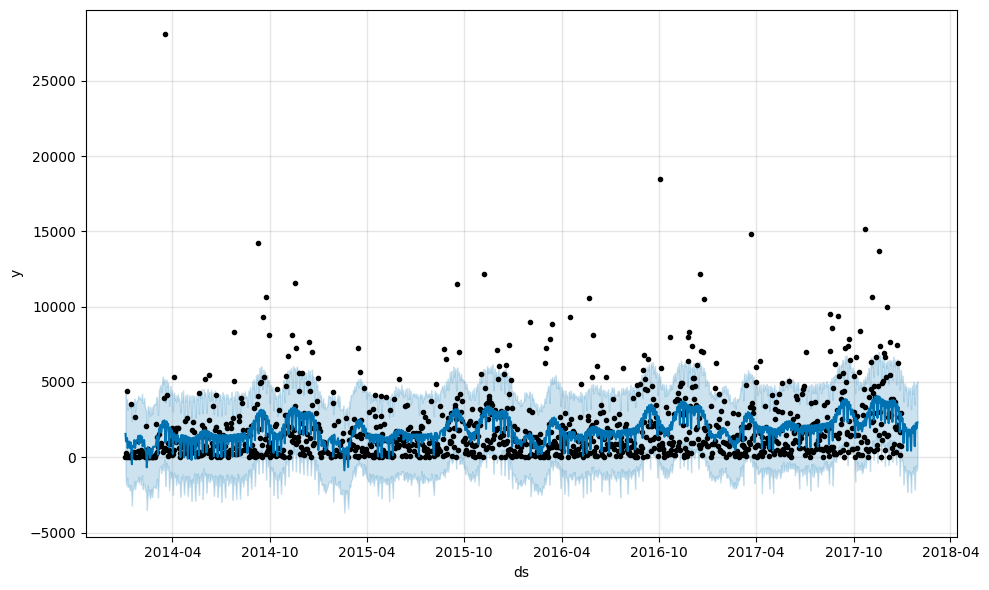

In [12]:
# 6. Plot Forecasted Results

fig = model.plot(forecast)

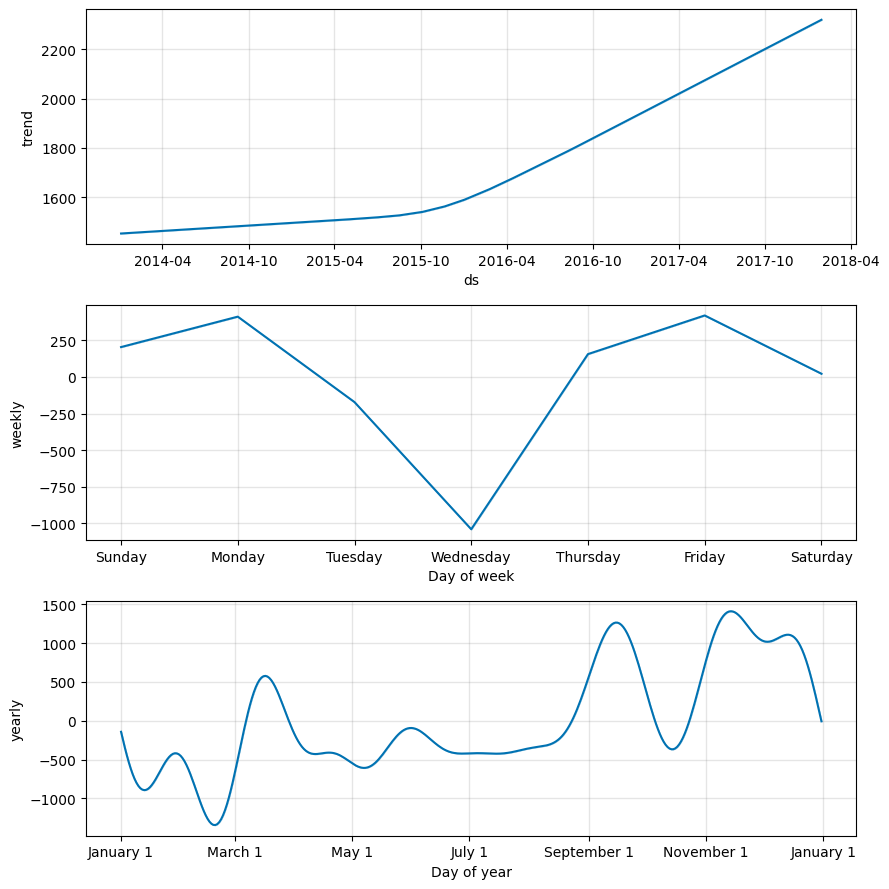

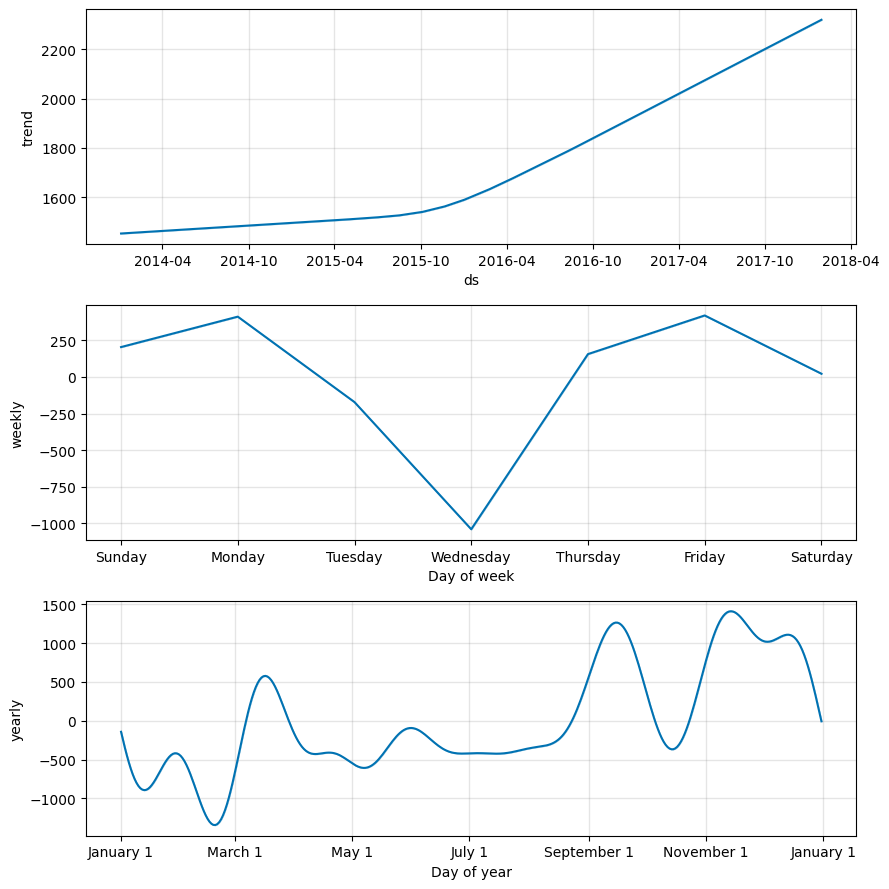

In [13]:
# 7. Plot Trend Components

model.plot_components(forecast)

# 📊 Step 4: Exploratory Data Analysis (EDA)

### 4.1 Monthly Sales Trend
- Line plot of sales over months.
- Helps identify seasonal trends.

### 4.2 Sales by Category
- Bar plot comparing total sales across categories.

### 4.3 Profit by Region
- Bar plot showing which region is most profitable.

### 4.4 Top 10 Products by Sales
- Reveals best selling products in the store.


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/sample_data/SampleSuperstore.csv", encoding='latin1')
df.columns = df.columns.str.strip() # remove unwanted spaces
df['Order Date'] =pd.to_datetime(df['Order Date']) #convert Order Date to datetime to fetch month week day

In [15]:
#from each row of Order Date we are fetching all this
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year
df['Week'] = df['Order Date'].dt.isocalendar().week
df['Day'] = df['Order Date'].dt.day
df['DayOfWeek'] = df['Order Date'].dt.dayofweek

In [16]:
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

In [17]:
# some manually holiday we given
import datetime
df['IsHoliday'] = df['Order Date'].isin([
    datetime.datetime(2019, 1, 1),
    datetime.datetime(2019, 8, 15),
    datetime.datetime(2019, 10, 2),
    datetime.datetime(2019, 12, 25)
]).astype(int)

In [18]:
df['7D_MA'] = df['Sales'].rolling(window=7).mean()  # 7 fays mobving average

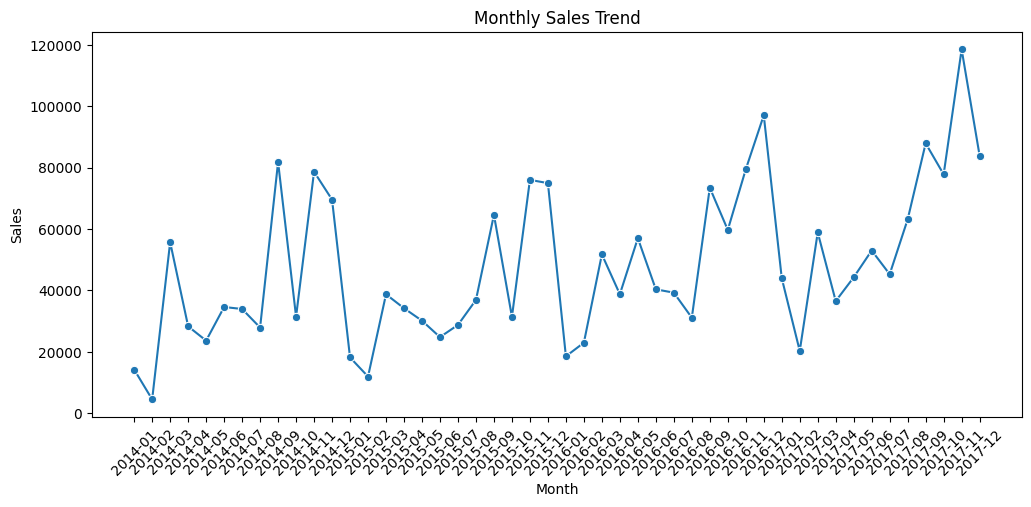

In [19]:
# 4.1. Total Sales per Month
df['Month']=df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
monthly_sales['Month']=monthly_sales['Month'].astype(str)
plt.figure(figsize=(12,5)) # graph canvas size
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o') # marker='o' means graph will dot
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.show()

In [20]:
# 4.2. Sales by Category
category_sales = df.groupby('Category')[['Sales','Profit']].sum().reset_index()

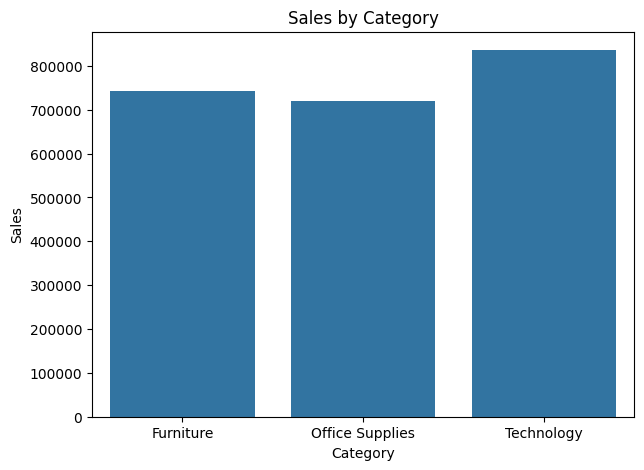

In [21]:
# Category by sales
plt.figure(figsize=(7,5))
sns.barplot(data=category_sales, x='Category', y='Sales')
plt.title('Sales by Category')
plt.show()

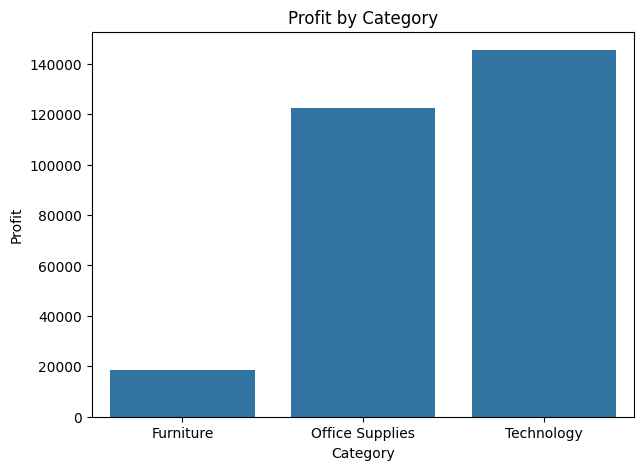

In [22]:
# Category by Profit
plt.figure(figsize=(7,5))
sns.barplot(data=category_sales, x='Category', y='Profit')
plt.title('Profit by Category')
plt.show()

In [23]:
# 4.3. Profit by Region

region_profit = df.groupby('Region')[['Sales','Profit']].sum().reset_index()

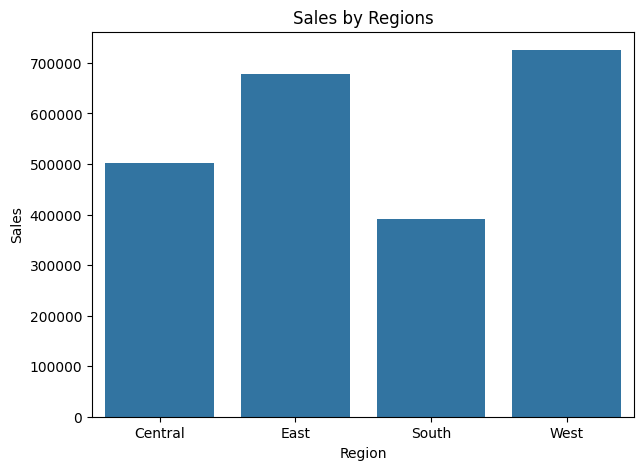

In [24]:
#Region by Sales
plt.figure(figsize=(7,5))
sns.barplot(data=region_profit, x='Region', y='Sales')
plt.title('Sales by Regions')
plt.show()

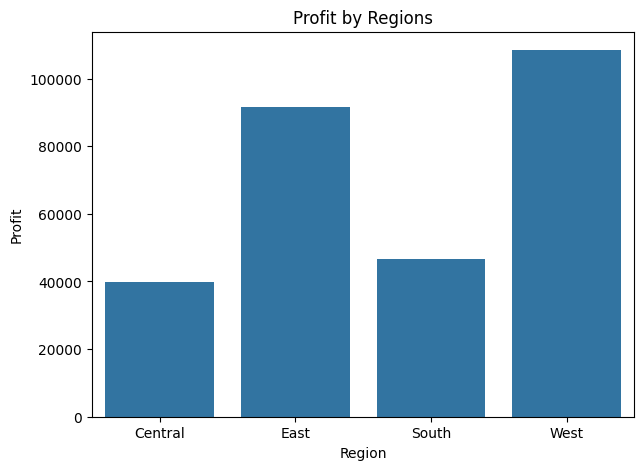

In [25]:
#Region by Profit
plt.figure(figsize=(7,5))
sns.barplot(data=region_profit, x='Region', y='Profit')
plt.title('Profit by Regions')
plt.show()

In [26]:
# # 4.4. Top 10 Products by Sales
top_products = df.groupby('Product Name')[['Sales','Profit']].sum().nlargest(10, 'Sales').reset_index()

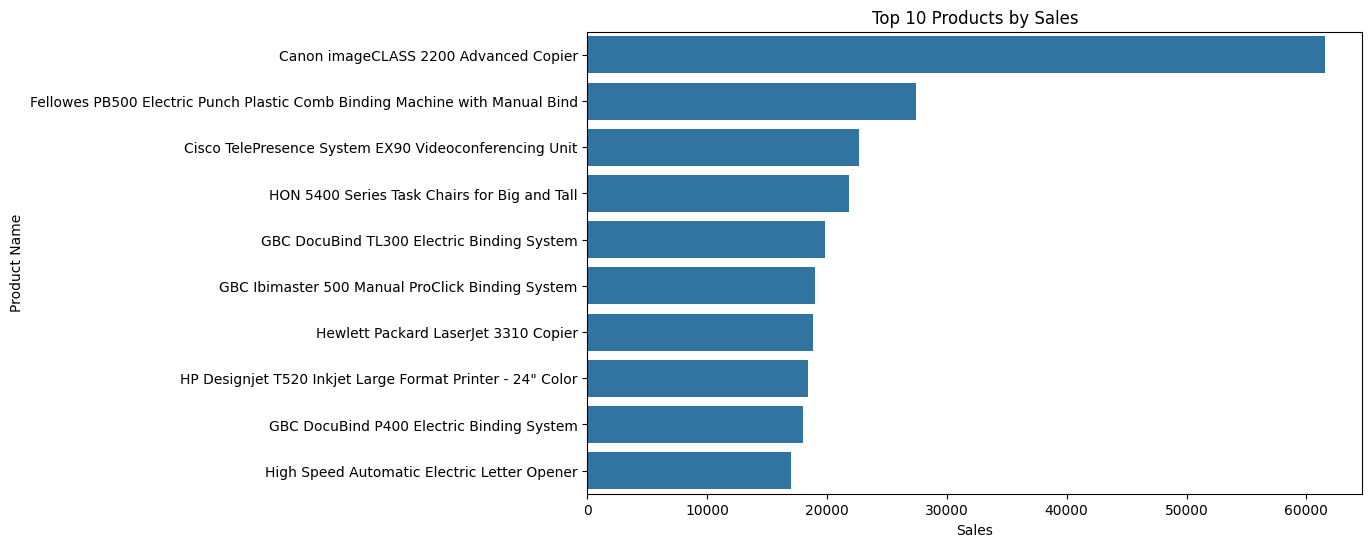

In [27]:
# Product by sales
plt.figure(figsize=(10,6))
sns.barplot(data=top_products, x='Sales', y="Product Name")
plt.title('Top 10 Products by Sales')
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.show()


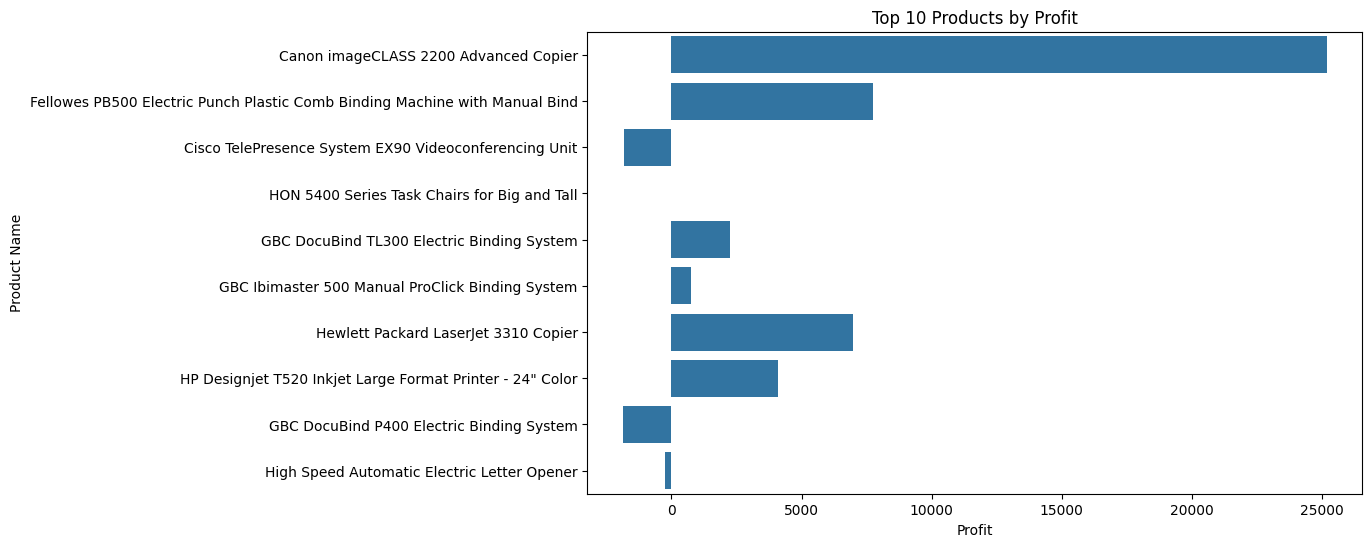

In [28]:
#product by Profit
plt.figure(figsize=(10,6))
sns.barplot(data=top_products, x='Profit', y="Product Name")
plt.title('Top 10 Products by Profit')
plt.xlabel('Profit')
plt.ylabel('Product Name')
plt.show()

# 🧮 Step 5: Monthly Sales vs Profit Analysis

In this step, we analyze how **Sales and Profit vary month-wise** to identify business patterns across the year.

### ✅ Tasks Performed:
- Extracted the **month** from the `Order Date` column.
- Grouped data **month-wise** for both **Sales** and **Profit**.
- Used **bar plots** to compare monthly performance visually.

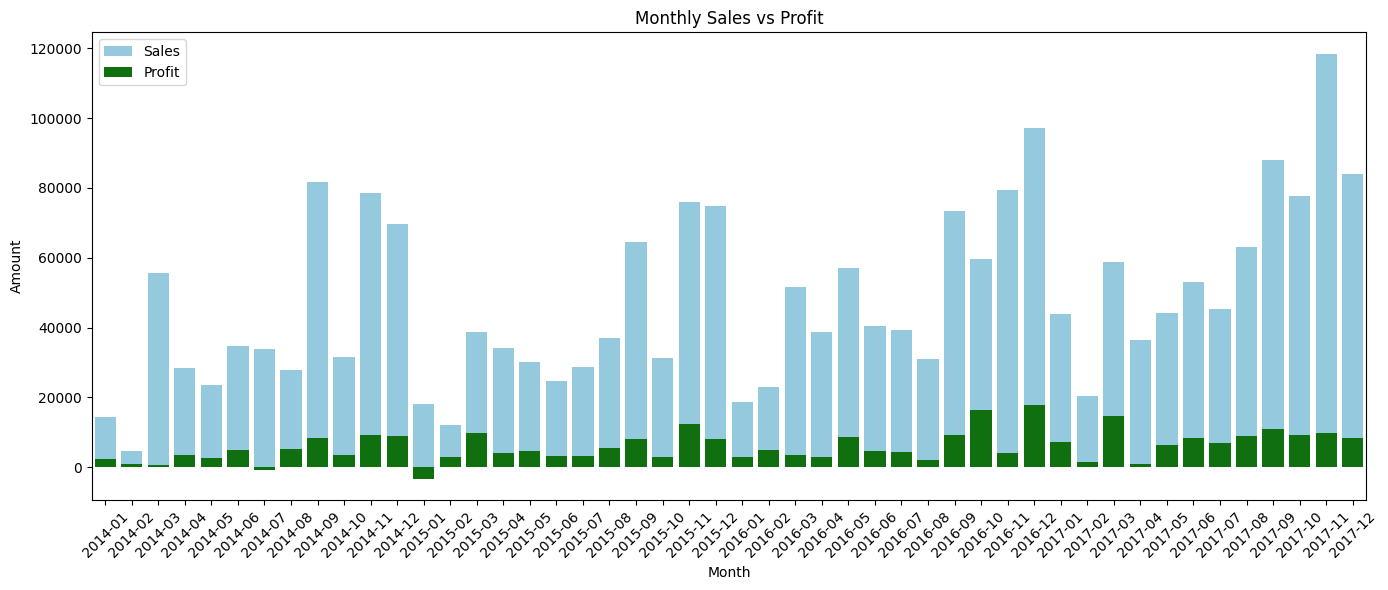

In [29]:
# new column create : Month
df['Month'] = df['Order Date'].dt.to_period('M')

# 2. Group by Month and aggregate Sales and Profit
monthly_data = df.groupby('Month')[['Sales', 'Profit']].sum().reset_index()

# 3. Month column ko string banao for plotting
monthly_data['Month']=monthly_data['Month'].astype(str)

# 4. Plotting
plt.figure(figsize=(14,6))
sns.barplot(data=monthly_data, x='Month', y='Sales', color='skyblue', label='Sales')
sns.barplot(data=monthly_data, x='Month', y='Profit', color='green', label='Profit')
plt.xticks(rotation=45)
plt.title('Monthly Sales vs Profit')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.tight_layout()
plt.show()

# 🧮 Step 6: Category-wise Sales and Profit Analysis

In this step, we analyze how much **Sales** and **Profit** are generated by different Product **Categories and Sub-Categories** to understand business performance better.


In [30]:
#1. make Group Category-wise:

category_perf = df.groupby('Category')[['Sales','Profit']].sum().reset_index()

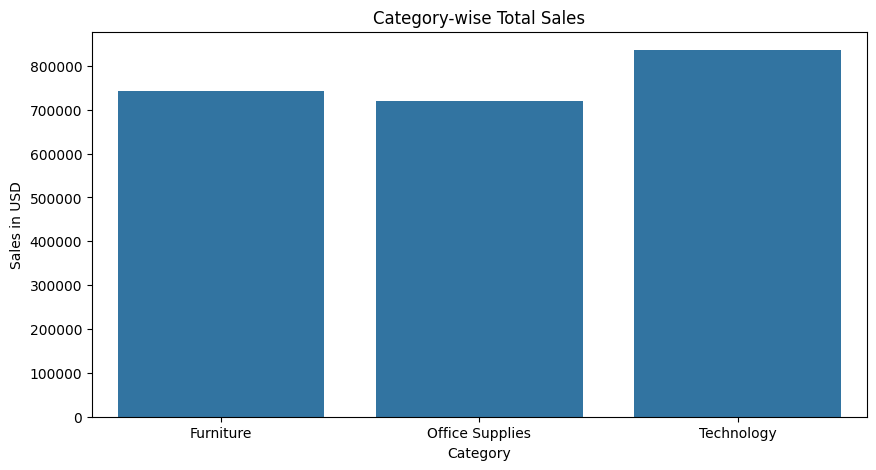

In [31]:
# makr plot
plt.figure(figsize=(10,5))
sns.barplot(data=category_perf, x='Category', y='Sales')
plt.title('Category-wise Total Sales')
plt.ylabel('Sales in USD')
plt.show()

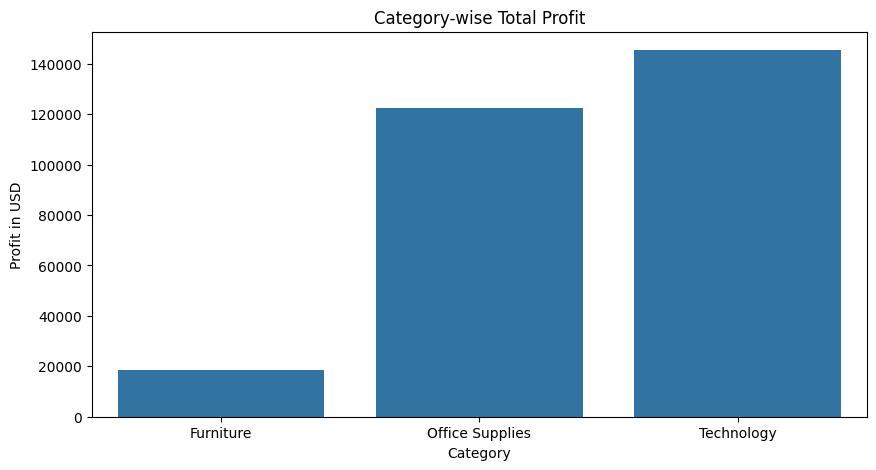

In [32]:
#Profit  bar plot:
plt.figure(figsize=(10,5))
sns.barplot(data=category_perf, x='Category', y='Profit')
plt.title('Category-wise Total Profit')
plt.ylabel('Profit in USD')
plt.show()

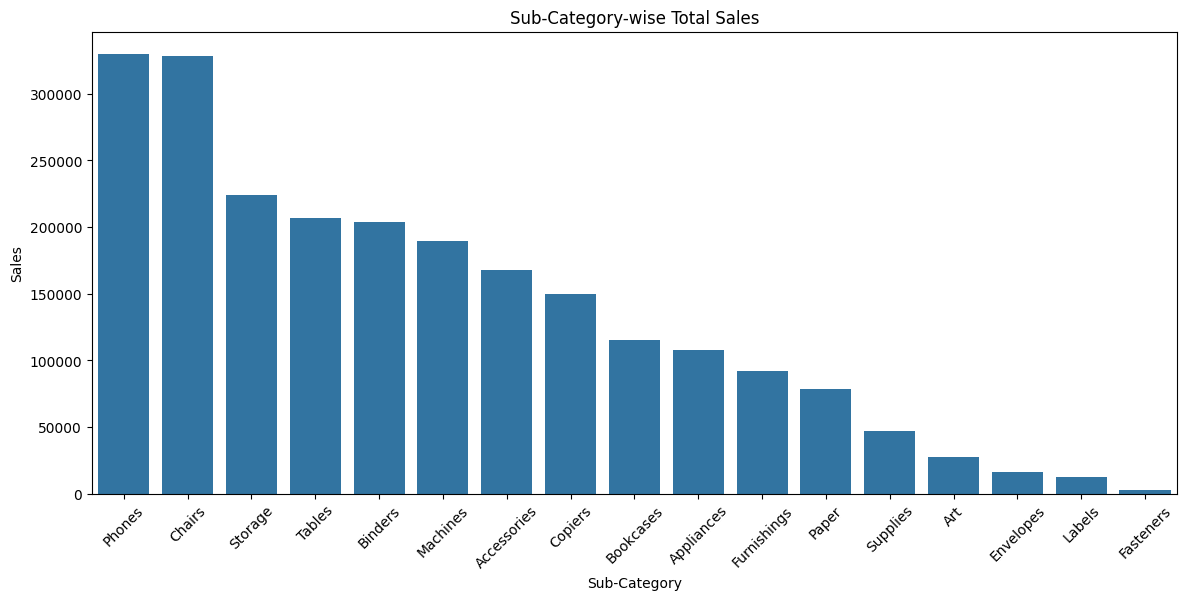

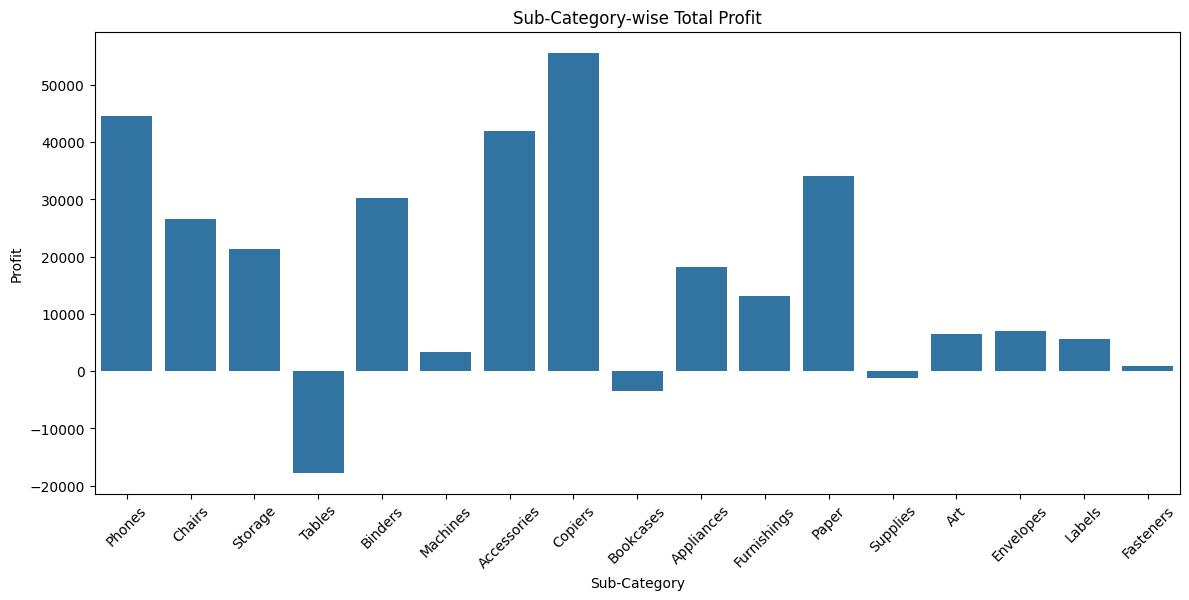

In [33]:
subcat_perf = df.groupby('Sub-Category')[['Sales','Profit']].sum().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(data=subcat_perf.sort_values(by='Sales', ascending=False), x='Sub-Category', y='Sales')
plt.title('Sub-Category-wise Total Sales')
plt.xticks(rotation=45) #tilted text in x axis
plt.show()

plt.figure(figsize=(14,6))
sns.barplot(data=subcat_perf.sort_values(by='Sales', ascending=False), x='Sub-Category', y='Profit')
plt.title('Sub-Category-wise Total Profit')
plt.xticks(rotation=45)
plt.show()

# 🧮 Step 7: State-wise Sales and Profit Analysis

Understand which states are performing well in terms of **sales and profit**, so business can target profitable regions and improve weak ones.

### ✅ Tasks Performed:
- Grouped data by State
- Bar plots of Sales and Profit
- Identify profitable and unprofitable states

In [34]:
#1. Group by State

state_perf = df.groupby('State')[['Sales', 'Profit']].sum().reset_index()

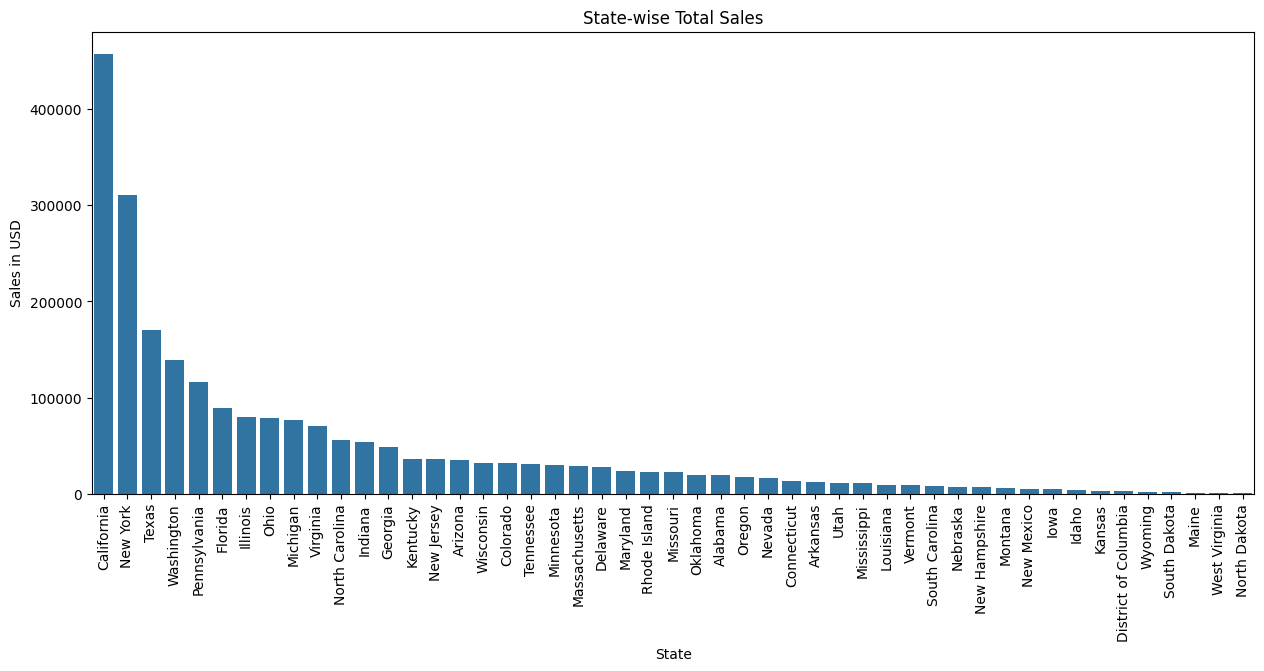

In [35]:
# 2. Sales Bar Plot - State Wise

plt.figure(figsize=(15,6))
sns.barplot(data=state_perf.sort_values(by='Sales', ascending=False), x='State', y='Sales')
plt.title("State-wise Total Sales")
plt.xticks(rotation=90)
plt.ylabel("Sales in USD")
plt.show()

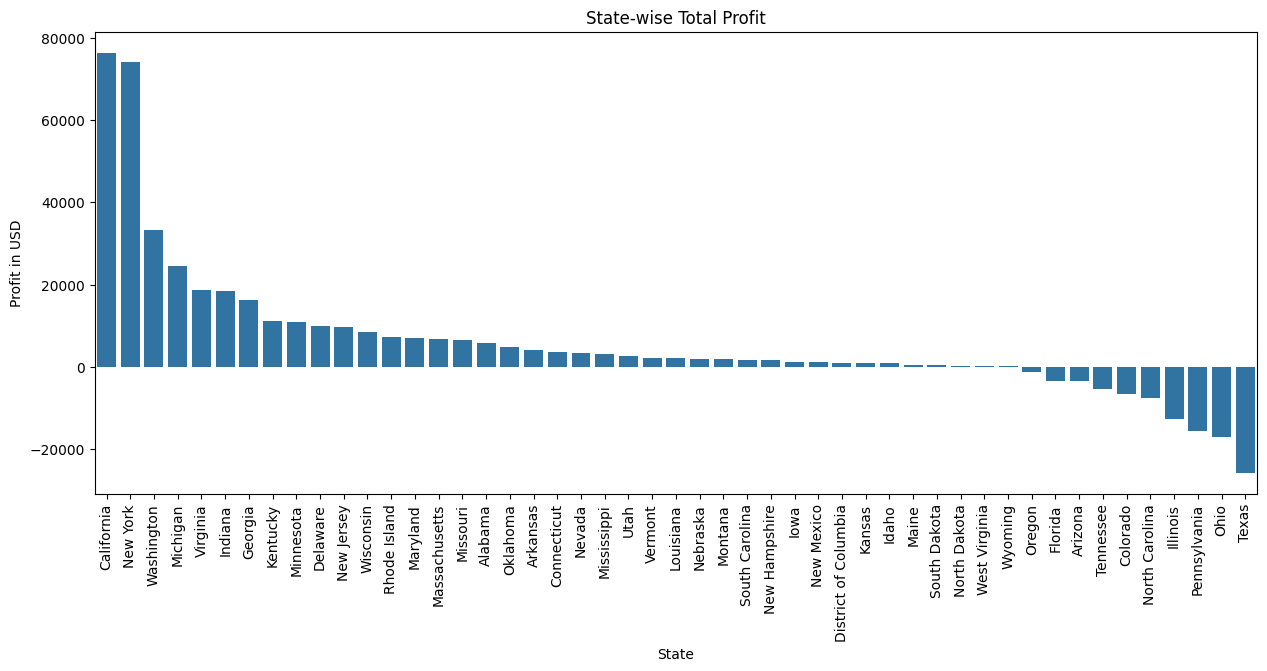

In [36]:
# 3. Profit Bar Plot - State Wise

plt.figure(figsize=(15,6))
sns.barplot(data=state_perf.sort_values(by='Profit', ascending=False), x='State', y='Profit')
plt.title("State-wise Total Profit")
plt.xticks(rotation=90)
plt.ylabel("Profit in USD")
plt.show()

# 🧮 Step 8: Customer Segment-wise Performance Analysis
* Understand which customer segments are
* generating more revenue (Sales) and profit.Target karna aasaan ho business strategy ke liye.

### ✅ Tasks Performed:
- Segment-wise Sales & Profit
- 2 Bar Plots
- Targeted campaigns and offers per customer type

In [37]:
#1. Segment-wise Grouping:
seg_perf = df.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()

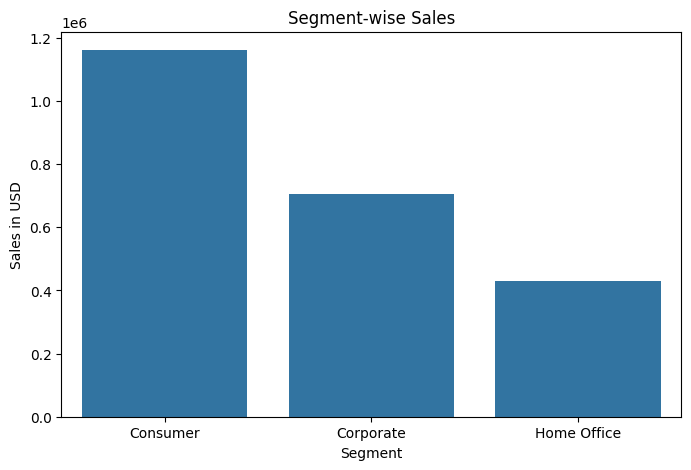

In [38]:
#2. Segment-wise Sales Plot
plt.figure(figsize=(8,5))
sns.barplot(data=seg_perf.sort_values(by='Sales', ascending=False), x='Segment', y='Sales')
plt.title("Segment-wise Sales")
plt.ylabel("Sales in USD")
plt.show()


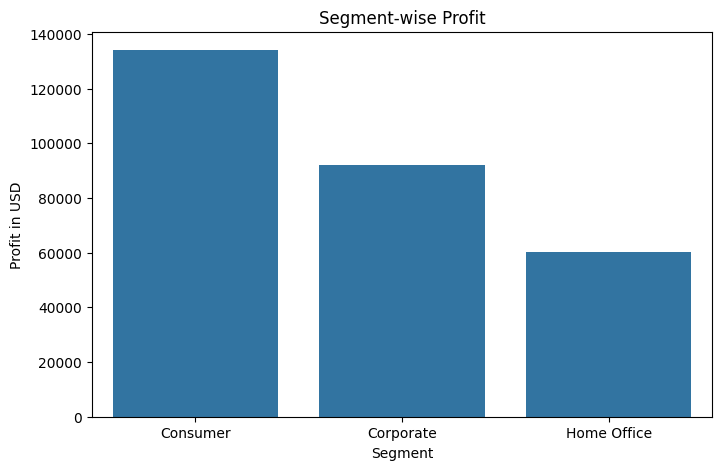

In [39]:
#3. Segment-wise Profit Plot
plt.figure(figsize=(8,5))
sns.barplot(data=seg_perf.sort_values(by='Profit', ascending=False), x='Segment', y='Profit')
plt.title("Segment-wise Profit")
plt.ylabel("Profit in USD")
plt.show()


In [40]:
df.to_csv("cleaned_superstore_data.csv", index=False)

In [41]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.to_csv("top_10_products_by_sales.csv")

In [42]:
category_profit = df.groupby('Category')['Profit'].sum()
category_profit.to_csv("category_profit_summary.csv")

In [43]:
monthly_sales = df.groupby(['Region', 'Month'])['Sales'].sum().reset_index()
monthly_sales.to_csv("region_monthly_sales.csv", index=False)

In [44]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [45]:
# Install ngrok
!pip install pyngrok

# Import it
from pyngrok import ngrok

# Connect your account (replace YOUR_AUTH_TOKEN with your real token)
!ngrok config add-authtoken <YOUR_AUTH_TOKEN>


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [63]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Create 100 rows of mock data
np.random.seed(42)
n = 100

data = {
    "Order ID": [f"ORD{i:04d}" for i in range(n)],
    "Order Date": pd.date_range(start="2024-01-01", periods=n, freq='D'),
    "Region": np.random.choice(["North", "South", "East", "West"], n),
    "Category": np.random.choice(["Electronics", "Clothing", "Home"], n),
    "Sales": np.random.randint(100, 2000, size=n),
    "Profit": np.random.randint(-200, 800, size=n),
    "Discount": np.random.uniform(0.0, 0.3, size=n),
    "IsWeekend": [date.weekday() >= 5 for date in pd.date_range("2024-01-01", periods=n)],
    "IsHoliday": np.random.choice([True, False], n, p=[0.1, 0.9])
}

df = pd.DataFrame(data)
df.to_csv("your_final_dataset.csv", index=False)



In [64]:
df = pd.read_csv("/content/your_final_dataset.csv", parse_dates=["Order Date"])

In [71]:
import os
os.system("nohup streamlit run /content/sample_data/app.py &")

0

In [67]:
!pkill -f ngrok

In [72]:
public_url = ngrok.connect("http://localhost:8501")
print("🔗 Your Streamlit Dashboard URL:", public_url)

🔗 Your Streamlit Dashboard URL: NgrokTunnel: "https://a8bf842d52fa.ngrok-free.app" -> "http://localhost:8501"
